In [20]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder


from sklearn.datasets import make_classification, make_regression
from sklearn.ensemble import StackingClassifier, StackingRegressor

# LV0
from sklearn.ensemble import RandomForestClassifier                     #1
from sklearn.svm import SVC                                             #2
from sklearn.neighbors import KNeighborsClassifier                      #3
#LV 1
from sklearn.linear_model import LogisticRegression  

Data Exploration and Preparation

https://www.kaggle.com/datasets/ruchikakumbhar/obesity-prediction/data

In [118]:
df = pd.read_csv(r"C:\Users\User\Desktop\test\Obesity prediction.csv")
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


FAVC : Do you eat high caloric food frequently?\
FCVC : Do you usually eat vegetables in your meals?\
NCP : How many main meals do you have daily?\
CAEC : Do you eat any food between meals?\
SMOKE : Do you smoke?\
CH2O : How much water do you drink daily?\
SCC : Do you monitor the calories you eat daily?\
FAF: How often do you have physical activity?\
TUE : How much time do you use technological devices such as cell phone, videogames, television, computer and others?\
CALC : How often do you drink alcohol?\
MTRANS : Which transportation do you usually use?

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [120]:
df.nunique()

Gender               2
Age               1402
Height            1574
Weight            1525
family_history       2
FAVC                 2
FCVC               810
NCP                635
CAEC                 4
SMOKE                2
CH2O              1268
SCC                  2
FAF               1190
TUE               1129
CALC                 4
MTRANS               5
Obesity              7
dtype: int64

In [121]:
num_features = df.select_dtypes(include=['float64']).columns.tolist()
cat_features= df.select_dtypes(include=['object']).columns.tolist()

In [122]:
num_features

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

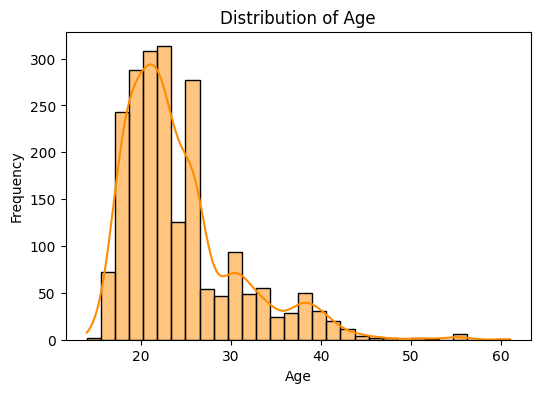

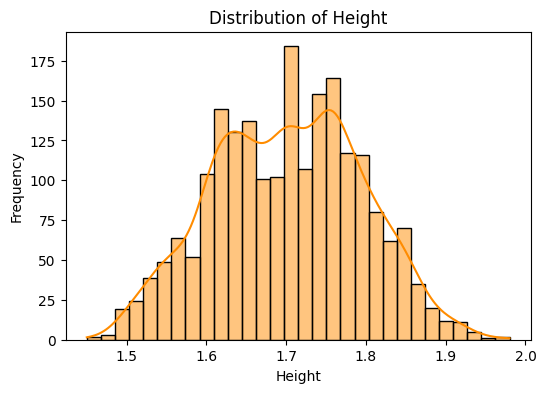

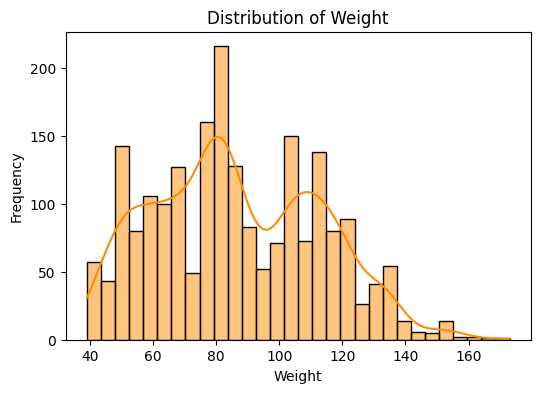

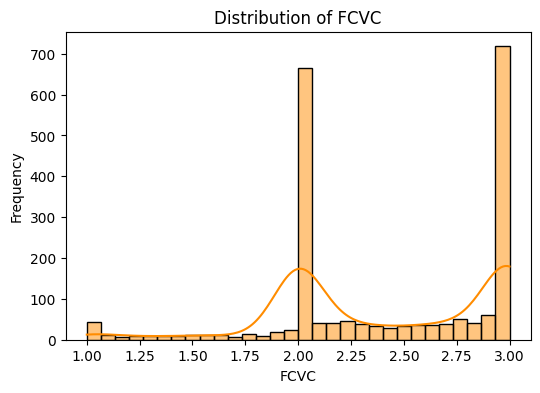

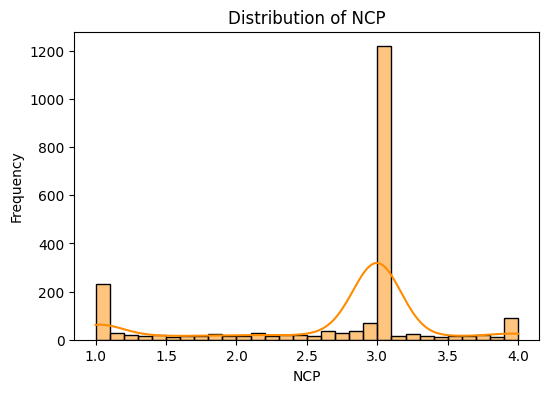

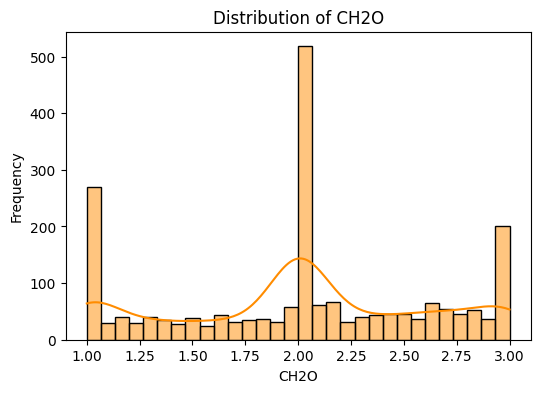

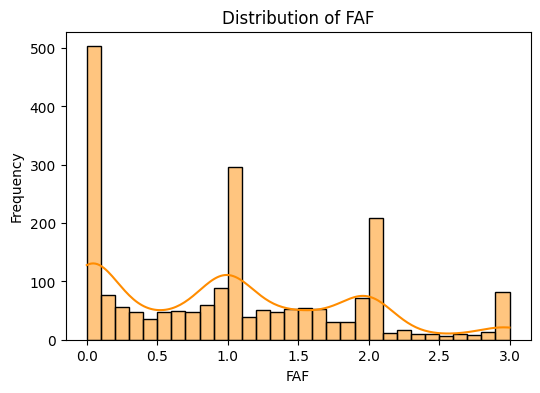

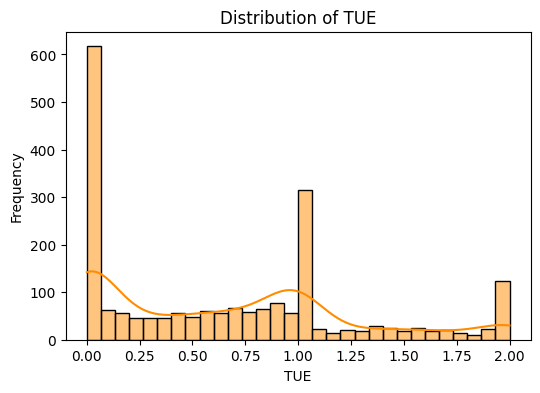

In [123]:
def plot_histograms(df, num_features):
    for column in num_features:
        plt.figure(figsize=(6, 4))
        # Create a histogram with KDE
        # plt.hist(df[column],bins=30)
        sns.histplot(df[column], bins=30, kde=True, color='#ff8c00')                      #kde = trend line
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

plot_histograms(df, num_features)

In [124]:
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

In [125]:
scaler = StandardScaler()
num_scaled = pd.DataFrame(scaler.fit_transform(df[num_features]), columns=num_features) 
num_scaled

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625
...,...,...,...,...,...,...,...,...
2106,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996
2107,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251
2108,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018
2109,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991


In [126]:
df = df.drop(columns=num_features)

In [127]:

final_df = pd.concat([num_scaled, df], axis=1)

In [128]:
x = final_df.drop(columns=['Obesity'],axis=1) 
y = final_df['Obesity']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.2)

Model Training

In [129]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score

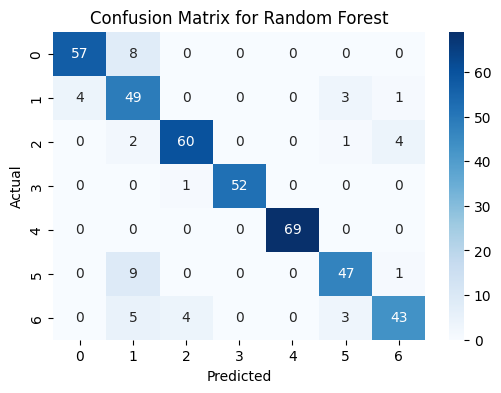

Classification Report for Random Forest:

Accuracy: 0.89
Precision (weighted): 0.90
Recall (weighted): 0.89
F1 Score (weighted): 0.89
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        65
           1       0.67      0.86      0.75        57
           2       0.92      0.90      0.91        67
           3       1.00      0.98      0.99        53
           4       1.00      1.00      1.00        69
           5       0.87      0.82      0.85        57
           6       0.88      0.78      0.83        55

    accuracy                           0.89       423
   macro avg       0.90      0.89      0.89       423
weighted avg       0.90      0.89      0.89       423

--------------------------------------------------


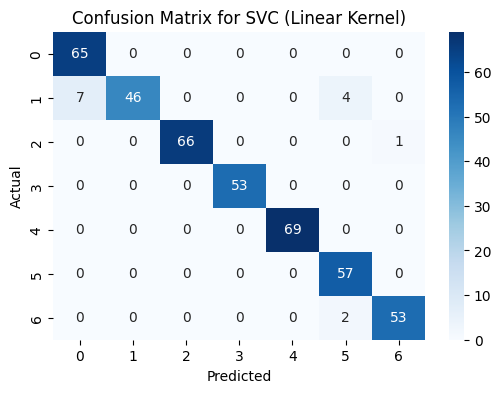

Classification Report for SVC (Linear Kernel):

Accuracy: 0.97
Precision (weighted): 0.97
Recall (weighted): 0.97
F1 Score (weighted): 0.97
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        65
           1       1.00      0.81      0.89        57
           2       1.00      0.99      0.99        67
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        69
           5       0.90      1.00      0.95        57
           6       0.98      0.96      0.97        55

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423

--------------------------------------------------


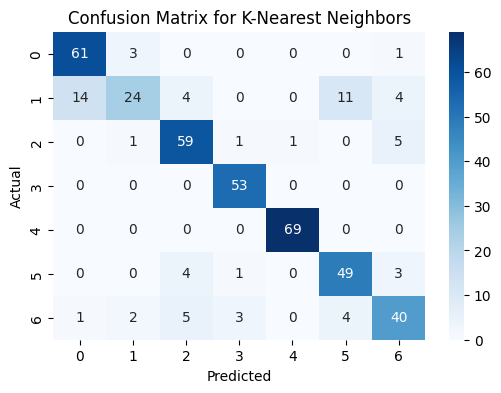

Classification Report for K-Nearest Neighbors:

Accuracy: 0.84
Precision (weighted): 0.84
Recall (weighted): 0.84
F1 Score (weighted): 0.83
              precision    recall  f1-score   support

           0       0.80      0.94      0.87        65
           1       0.80      0.42      0.55        57
           2       0.82      0.88      0.85        67
           3       0.91      1.00      0.95        53
           4       0.99      1.00      0.99        69
           5       0.77      0.86      0.81        57
           6       0.75      0.73      0.74        55

    accuracy                           0.84       423
   macro avg       0.83      0.83      0.82       423
weighted avg       0.84      0.84      0.83       423

--------------------------------------------------


In [130]:
#Baseline Model

estimators = [
    ('Random Forest', RandomForestClassifier(n_estimators=5, random_state=0)),
    ('SVC (Linear Kernel)', SVC(kernel='linear', probability=True)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
]

# Loop through the estimators
for name, model in estimators:
    model.fit(x_train, y_train)  
    y_pred = model.predict(x_test)  
    cfmx = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cfmx, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test), 
                yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    print(f"Classification Report for {name}:\n")
    print('Accuracy:', '{:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision (weighted):', '{:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
    print('Recall (weighted):', '{:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
    print('F1 Score (weighted):', '{:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
    
    # Full classification report
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Hyperparameter Tuning

In [131]:
from sklearn.model_selection import GridSearchCV

estimators_and_params = [
    ('Random Forest', RandomForestClassifier(random_state=0), {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5],
        'criterion': ['gini', 'entropy']
    }),
    ('SVC', SVC(), [
        {'kernel': ['linear'], 'C': [0.1, 1, 5, 10, 50]},
        {'kernel': ['rbf'], 'C': [0.1, 1, 5, 10, 50], 'gamma': list(range(1, 10))},
        {'kernel': ['poly'], 'C': [0.1, 1, 5, 10, 50], 'degree': list(range(1, 10))}
    ]),
    ('K-Nearest Neighbors', KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }),
]

In [132]:
for name, model, param_grid in estimators_and_params:
    print(f"Running GridSearchCV for {name}\n")
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
    grid_search.fit(x_train, y_train) 
    
    # Best parameters and best score
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best CV Score for {name}: {grid_search.best_score_}\n")
    
    # Evaluate on test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)  
    

Running GridSearchCV for Random Forest

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Score for Random Forest: 0.9496637578354081

Running GridSearchCV for SVC

Fitting 5 folds for each of 95 candidates, totalling 475 fits
Best Parameters for SVC: {'C': 50, 'kernel': 'linear'}
Best CV Score for SVC: 0.9597281969343143

Running GridSearchCV for K-Nearest Neighbors

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters for K-Nearest Neighbors: {'n_neighbors': 3, 'weights': 'distance'}
Best CV Score for K-Nearest Neighbors: 0.8495303144698261



In [134]:
best_estimators = [
    ('Random Forest', RandomForestClassifier(criterion="gini" ,n_estimators=100, random_state=0,max_depth= None, min_samples_split= 5)),
    ('SVC (Linear Kernel)', SVC(kernel='linear', C=50)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=3, weights='distance')),
]

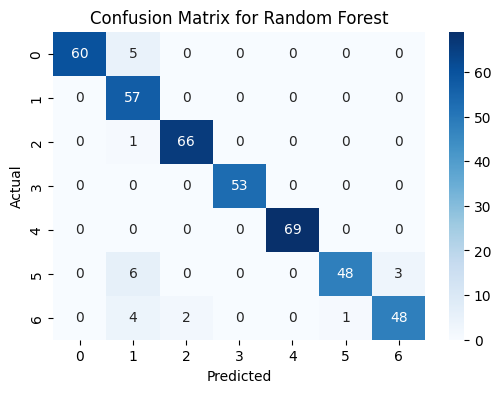

Classification Report for Random Forest:

Accuracy: 0.95
Precision (weighted): 0.96
Recall (weighted): 0.95
F1 Score (weighted): 0.95
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        65
           1       0.78      1.00      0.88        57
           2       0.97      0.99      0.98        67
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        69
           5       0.98      0.84      0.91        57
           6       0.94      0.87      0.91        55

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.96      0.95      0.95       423

--------------------------------------------------


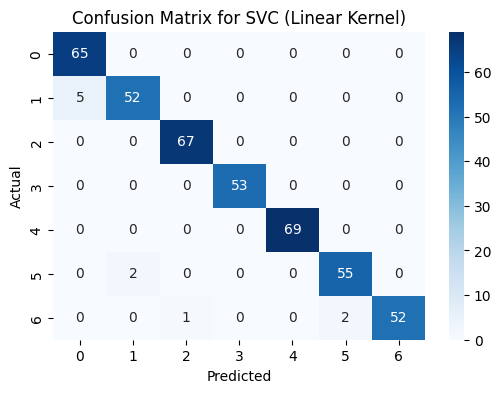

Classification Report for SVC (Linear Kernel):

Accuracy: 0.98
Precision (weighted): 0.98
Recall (weighted): 0.98
F1 Score (weighted): 0.98
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        65
           1       0.96      0.91      0.94        57
           2       0.99      1.00      0.99        67
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        69
           5       0.96      0.96      0.96        57
           6       1.00      0.95      0.97        55

    accuracy                           0.98       423
   macro avg       0.98      0.97      0.98       423
weighted avg       0.98      0.98      0.98       423

--------------------------------------------------


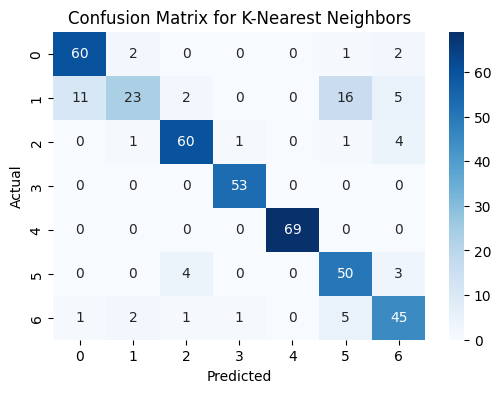

Classification Report for K-Nearest Neighbors:

Accuracy: 0.85
Precision (weighted): 0.86
Recall (weighted): 0.85
F1 Score (weighted): 0.84
              precision    recall  f1-score   support

           0       0.83      0.92      0.88        65
           1       0.82      0.40      0.54        57
           2       0.90      0.90      0.90        67
           3       0.96      1.00      0.98        53
           4       1.00      1.00      1.00        69
           5       0.68      0.88      0.77        57
           6       0.76      0.82      0.79        55

    accuracy                           0.85       423
   macro avg       0.85      0.85      0.84       423
weighted avg       0.86      0.85      0.84       423

--------------------------------------------------


In [135]:
for name, model in best_estimators:
    model.fit(x_train, y_train)  
    y_pred = model.predict(x_test)  
    cfmx = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cfmx, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test), 
                yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    print(f"Classification Report for {name}:\n")
    print('Accuracy:', '{:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision (weighted):', '{:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
    print('Recall (weighted):', '{:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
    print('F1 Score (weighted):', '{:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
    
    # Full classification report
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Ensemble Learning

In [108]:
from sklearn.ensemble import GradientBoostingClassifier

In [136]:
stack = StackingClassifier(estimators=best_estimators, final_estimator=GradientBoostingClassifier())
stack.fit(x_train,y_train)

score = stack.score(x_test,y_test)

y_pred_stacked = stack.predict(x_test)
print("Stacking Score: ",score)

Stacking Score:  0.9787234042553191


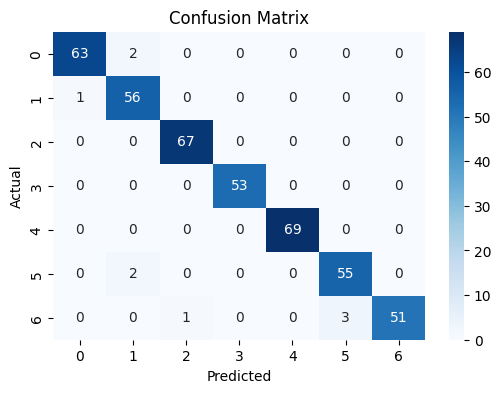

In [137]:
cfmx = confusion_matrix(y_test,y_pred_stacked)
plt.figure(figsize=(6, 4))
sns.heatmap(cfmx, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [138]:
print("<<<<< Stacking Model Evaluation Matrix >>>>>")
print('Accuracy:', '{:.2f}'.format(accuracy_score(y_test, y_pred_stacked)))
print('Precision:', '{:.2f}'.format(precision_score(y_test, y_pred_stacked,average='weighted')))
print('Recall:', '{:.2f}'.format(recall_score(y_test, y_pred_stacked,average='weighted')))
print('F1 Score:', '{:.2f}'.format(f1_score(y_test, y_pred_stacked,average='weighted')))
err = (cfmx[0, 1] + cfmx[1, 0]) / y_test.count()
print('Error Rate', '{:.2f}'.format(err))
print()
print("<<<<< Classification Report >>>>>")
print()
print(classification_report(y_test, y_pred_stacked))

<<<<< Stacking Model Evaluation Matrix >>>>>
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
Error Rate 0.01

<<<<< Classification Report >>>>>

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        65
           1       0.93      0.98      0.96        57
           2       0.99      1.00      0.99        67
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        69
           5       0.95      0.96      0.96        57
           6       1.00      0.93      0.96        55

    accuracy                           0.98       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.98      0.98      0.98       423



Analysis and Discussion 

In [139]:
all_models = [
    ('Random Forest (Baseline)', estimators[0][1]),
    ('SVC (Linear Kernel, Baseline)', estimators[1][1]),
    ('K-Nearest Neighbors (Baseline)', estimators[2][1]),
    ('Random Forest (Tuned)', best_estimators[0][1]),
    ('SVC (Linear Kernel, Tuned)', best_estimators[1][1]),
    ('K-Nearest Neighbors (Tuned)', best_estimators[2][1]),
    ('Stacking Ensemble', stack)
]

metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

for name, model in all_models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Calculate metrics
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    metrics['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    metrics['F1-Score'].append(f1_score(y_test, y_pred, average='weighted'))

metrics_df = pd.DataFrame(metrics)

display(metrics_df)

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest (Baseline),0.891253,0.900049,0.891253,0.893461
1,"SVC (Linear Kernel, Baseline)",0.966903,0.969819,0.966903,0.966250
2,K-Nearest Neighbors (Baseline),0.839243,0.837516,0.839243,0.828816
3,Random Forest (Tuned),0.947991,0.955408,0.947991,0.948770
4,"SVC (Linear Kernel, Tuned)",0.976359,0.976976,0.976359,0.976264
5,K-Nearest Neighbors (Tuned),0.851064,0.855913,0.851064,0.841766
6,Stacking Ensemble,0.981087,0.981485,0.981087,0.981051


**Observation**
- SVC (Linear Kernel) achieved the highest accuracy among baseline models.
- After hyperparameter tuning, the Random Forest model showed the most significant improvement among all candidates.



**Challenges**
- Using Logistic Regression as the final_estimator in the stacking model resulted in lower performance compared to non-ensemble models.